#Task 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

1. Read the CSV file (use the read_csv function)

In [2]:
uploaded = files.upload()

Saving bestsellers with categories.csv to bestsellers with categories.csv


In [3]:
df = pd.read_csv('bestsellers with categories.csv')

2. Display the first five rows (use the head function)

In [4]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


3. Display the dimensions of the dataset (use the shape attribute)

In [5]:
rows, columns = df.shape
print("Rows:", rows)
print("Columns:", columns)

Rows: 550
Columns: 7


 * Question: How many books does the dataset contain?**Текст, выделенный полужирным шрифтом**

In [6]:
print("How many books does the dataset contain?")
df.shape[0]

How many books does the dataset contain?


550

** Code simplification **

In [7]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

##Exploratory Data Analysis (EDA)

1. Check if all rows have complete data: output the number of missing values (NAs) in each column (use the isna and sum functions).

In [8]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

* Answer: Are there any missing values in any variables? (Yes / No)

In [9]:
result = sum(df.isna().sum())
if result > 0:
    res = 'Yes'
else:
    res = 'No'

print(f"Are there any missing values in any variables? (Yes / No). Answer: {res}")


Are there any missing values in any variables? (Yes / No). Answer: No


2. Check the unique values in the 'genre' column (use the unique function).

In [10]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

* Answer: What are the unique genres?

In [11]:
result = df['genre'].unique()
print('What are the unique genres? Answer:', ', '.join(result))

What are the unique genres? Answer: Non Fiction, Fiction


3. Now, examine the distribution of prices: create a histogram (use kind='hist').

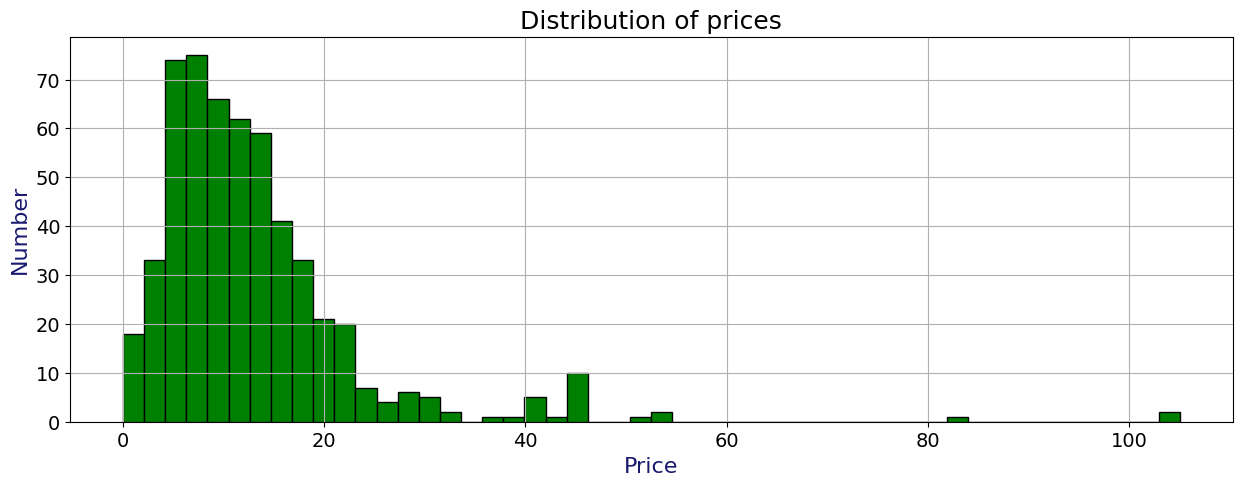

In [12]:
fig = plt.subplots(figsize=(15, 5))
df.price.plot(kind='hist', fontsize=14, grid=True, bins=50, color='green', edgecolor="black")
plt.title("Distribution of prices", fontdict = {'fontsize' : 18})
plt.xlabel("Price", size=16, color="midnightblue")
plt.ylabel("Number", size=16, color="midnightblue")
plt.show()

4. Determine the maximum, minimum, mean, and median prices using the functions max, min, mean, and median.

In [13]:
max_price = df['price'].max()
min_price = df['price'].min()
ave_price = df['price'].mean()
median_price = df['price'].median()

* Answers:

1. Maximum Price?
2. Minimum Price?
3. Mean Price?
4. Median Price?

In [14]:
print(f"Maximum Price? Answers: {max_price}$")
print(f"Minimum Price? Answers: {min_price}$")
print(f"Mean Price? Answers: {ave_price}$")
print(f"Median Price? Answers: {median_price}$")

Maximum Price? Answers: 105$
Minimum Price? Answers: 0$
Mean Price? Answers: 13.1$
Median Price? Answers: 11.0$


##Data Search and Sorting

* Answer: What is the highest rating in the dataset?

In [15]:
max_rating = df['user_rating'].max()
print("What is the highest rating in the dataset?")
print(f"Answer: {max_rating}")

What is the highest rating in the dataset?
Answer: 4.9


* Answer: How many books have this rating?

In [16]:
count_max_rating = df[df['user_rating'] == max_rating].shape[0]
print("How many books have this rating?")
print(f"Answer: {count_max_rating}")

How many books have this rating?
Answer: 52


* Answer: Which book has the most reviews?


In [17]:
max_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].values[0]
print("Which book has the most reviews?")
print(f"Answer: {max_reviews_book}")

Which book has the most reviews?
Answer: Where the Crawdads Sing


* Answer: Among the books that made it to the Top 50 in 2015, which one is the most expensive (you can use an intermediate DataFrame)?

In [18]:
top_2015 = df[df['year'] == 2015]
most_expensive_2015 = top_2015[top_2015['price'] == top_2015['price'].max()]['name'].values[0]
print("Among the books that made it to the Top 50 in 2015, which one is the most expensive?")
print(f"Answer: {most_expensive_2015}")

Among the books that made it to the Top 50 in 2015, which one is the most expensive?
Answer: Publication Manual of the American Psychological Association, 6th Edition


* Answer: How many books of the Fiction genre made it to the Top 50 in 2010 (use &)?

In [19]:
count_fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print("How many books of the Fiction genre made it to the Top 50 in 2010?")
print(f"Answer: {count_fiction_2010}")

How many books of the Fiction genre made it to the Top 50 in 2010?
Answer: 20


* Answer: How many books with a rating of 4.9 made it to the Top 50 in both 2010 and 2011 (use | or the isin function)?

In [20]:
count_4_9 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print("How many books with a rating of 4.9 made it to the Top 50 in both 2010 and 2011?")
print(f"Answer: {count_4_9}")

How many books with a rating of 4.9 made it to the Top 50 in both 2010 and 2011?
Answer: 1


Finally, let's sort in ascending order all the books that made it to the Top 50 in 2015 and cost less than 8 dollars (use the sort_values function).

In [21]:
filtered_df = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_df = filtered_df.sort_values(by='price')

* Answer: Which book is the last one in the sorted list?

In [22]:
last_book = sorted_df.iloc[-1]['name']
print("Which book is the last one in the sorted list?")
print(f"Answer: {last_book}")

Which book is the last one in the sorted list?
Answer: Old School (Diary of a Wimpy Kid #10)


##Data Aggregation and Table Joining

1. Let's start by looking at the maximum and minimum prices for each of the genres (use the groupby and agg functions, use max and min for calculating maximum and minimum values). Select only the necessary columns.

In [23]:
genre_price_stats = df.groupby('genre')['price'].agg(['max', 'min'])
gender_max_fic = genre_price_stats.loc['Fiction', 'max']
gender_min_fic = genre_price_stats.loc['Fiction', 'min']
gender_max_fic_n = genre_price_stats.loc['Non Fiction', 'max']
gender_min_fic_n = genre_price_stats.loc['Non Fiction', 'min']

* Answer: Maximum price for the Fiction genre
* Answer: Minimum price for the Fiction genre
* Answer: Maximum price for the Non Fiction genre
* Answer: Minimum price for the Non Fiction genre

In [24]:
print(f"Maximum price for the Fiction genre {gender_max_fic}")
print(f"Minimum price for the Fiction genre {gender_min_fic}")
print(f"Maximum price for the Non Fiction genre {gender_max_fic_n}")
print(f"Minimum price for the Non Fiction genre {gender_min_fic_n}")

Maximum price for the Fiction genre 82
Minimum price for the Fiction genre 0
Maximum price for the Non Fiction genre 105
Minimum price for the Non Fiction genre 0


2. Now create a new dataframe that will contain the count of books for each author (use the groupby and agg functions, use count for calculating the count). Select only the necessary columns.

In [25]:
author_book_counts = df.groupby('author')['name'].count().reset_index()
rows, columns = df.shape
max_author = author_book_counts[author_book_counts['name'] == author_book_counts['name'].max()]

* Answer: What is the dimensions of the resulting table?
* Answer: Which author has the most books?
* Answer: How many books does this author have?

In [26]:
print("What is the dimensions of the resulting table?")
print(f"Answer: (Rows: {rows}, Columns: {columns})")
print(f"Which author has the most books?")
print(f"Answer: {max_author['author'].values[0]}")
print(f"How many books does this author have?")
print(f"Answer: {max_author['name'].values[0]}")

What is the dimensions of the resulting table?
Answer: (Rows: 550, Columns: 7)
Which author has the most books?
Answer: Jeff Kinney
How many books does this author have?
Answer: 12


3. Next, create a second dataframe that will contain the average rating for each author (use the groupby and agg functions, use mean for calculating the mean value). Select only the necessary columns.

In [27]:
author_avg_rating = df.groupby('author')['user_rating'].mean().reset_index()
min_avg_rating_author = author_avg_rating[author_avg_rating['user_rating'] == author_avg_rating['user_rating'].min()]

* Answer: Which author has the lowest average rating?
* Answer: What is the average rating for this author?


In [28]:
print(f"Which author has the lowest average rating?")
print(f"Answer: {min_avg_rating_author['author'].values[0]}")
print(f"What is the average rating for this author?")
print(f"Answer: {min_avg_rating_author['user_rating'].values[0]}")

Which author has the lowest average rating?
Answer: Donna Tartt
What is the average rating for this author?
Answer: 3.9


4. Join the last two dataframes so that each author's book count and average rating are displayed. Save the result in a variable.

In [29]:
combined_df = pd.concat([author_book_counts, author_avg_rating['user_rating']], axis=1)
combined_df.columns = ['author', 'book_count', 'avg_rating']


5. Sort the dataframe in ascending order based on the book count and then the average rating.

In [30]:
sorted_combined_df = combined_df.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True])

* Answer: Which author is first in the list?

In [31]:
print(f"Which author is first in the list?")
print(f"Answer: {sorted_combined_df['author'].iloc[0]}")

Which author is first in the list?
Answer: Muriel Barbery


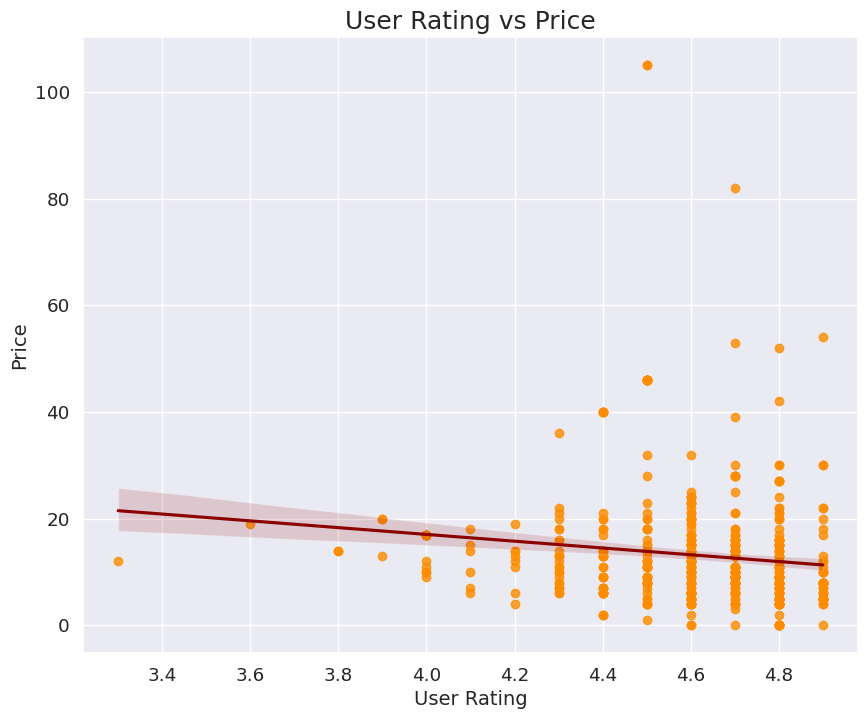

In [32]:
sns.set(style='darkgrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(data=df, x='user_rating', y='price', color='darkorange', line_kws={'color': 'darkred'})
ax.set_title('User Rating vs Price', fontsize=18)
ax.set_xlabel('User Rating', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
plt.show()

In [33]:
!pip install mplcyberpunk
import mplcyberpunk

plt.style.use("cyberpunk")

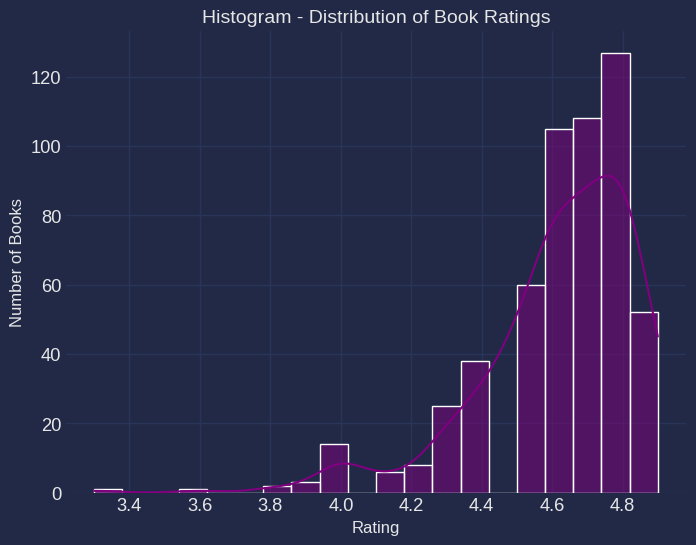

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='user_rating', bins=20, kde=True, color='purple')
plt.title('Histogram - Distribution of Book Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.show()

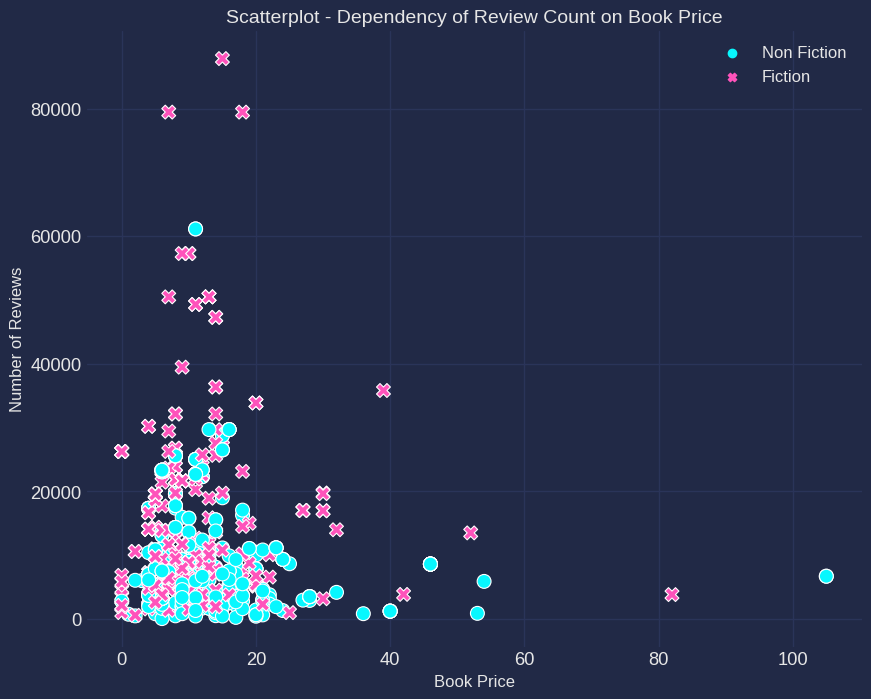

In [35]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='price', y='reviews', hue='genre', style='genre', s=100)
plt.title('Scatterplot - Dependency of Review Count on Book Price', fontsize=14)
plt.xlabel('Book Price', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(fontsize=12)
plt.show()